# Mental Health Analysis📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

The increasing prevelance of mental illnesses without understanding all the causing of the illnesses which reduces people's quality of life.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

I am trying to answer the the question of what factors can cause increases in mental illness and how can we use that knowledge to help others?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

An answer to me would be prevelant enviromental factors that can cause increased rates of mental illness and how we could reduce those enviromental factors.

![graphmap](./assets/graphmap.jpeg)

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

https://mhanational.org/research-and-reports/

https://www.cdc.gov/mental-health/about-data/suicidal-thoughts-and-behavior.html

https://www.cdc.gov/mental-health/about-data/conditions-care.html

I am going to relate this data by looking at the correlation of anxiety and depression rates among different groups and how that affects suicide rate among those same groups and use that data in tandem with analysis on how things like region and living area (urban, rural, etc) have different rates of mental illness and determine what differences could cause that.


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

My approach will be to use data visualizations such as bar graphs and map visualizations to display variations of different factors such as suicide rates, depression/anxiety rates. This would make understanding various factors at once much easier because you can see how they would connect.


In [107]:
# Start your code here
import pandas as pd
import pdfplumber

cdc_er_suicide_visits= pd.read_csv("sources/National_Syndromic_Surveillance_Program_(NSSP)_Mental_Health-Related_Emergency_Department_Visit_Rates_20250929.csv")
cdc_youth_suicide_attempt_rates= pd.read_csv("sources/Youth_Risk_Behavioral_Surveillance_System_(YRBSS)_-_Mental_Health_Indicators_20250929.csv")

cdc_adult_depression_rates= pd.read_csv("sources/National_Health_Interview_Survey_(NHIS)_-_Mental_Health_Indicators_20250929.csv")
cdc_state_depression_rates= pd.read_csv("sources/Behavioral_Risk_Factor_Surveillance_System_(BRFSS)_-_Mental_Health_Indicators_20250929.csv")

with pdfplumber.open("sources/2024-State-of-Mental-Health-in-America-Report.pdf") as pdf:
    page = pdf.pages[10]
    table_area = (300,0,page.width,page.height)
    cropped = page.crop(table_area)
    table = cropped.extract_tables()
    mha_state_of_mental_health_report_2024 = pd.DataFrame(table[0])

with pdfplumber.open("sources/2023-State-of-Mental-Health-in-America-Report.pdf") as pdf:
    page = pdf.pages[11]
    table_area = (300,0,page.width,page.height)
    cropped = page.crop(table_area)
    table = cropped.extract_tables()
    mha_state_of_mental_health_report_2023 = pd.DataFrame(table[0])


# Data Cleaning and Transformation

This cell is forcing all data in the Percent column into a numeric format, this forces any non numeric data to become NaN which I am then dropping on the next line which allows for better 
representation on graphs. I chose to convert it and drop the NaN because there isn't a good way to estimate the rates of the missing rows since data can vary widely depending on area or other factors.

In [136]:

cdc_youth_suicide_attempt_rates['Percent'] = pd.to_numeric(cdc_youth_suicide_attempt_rates['Percent'], errors='coerce')
cdc_youth_suicide_attempt_rates = cdc_youth_suicide_attempt_rates.dropna()


This cell is taking the dataframe generated by scanning the pdf documents and only saving the two columns that are useful for analysis and visualization because the other columns are
pretty much empty. I had to filter the columns down to make them easier to reference and for readability sake if I need to view the dataframe when determining visualizations and reducing duplicate blank columns.

In [134]:
mha_state_of_mental_health_report_2024 = mha_state_of_mental_health_report_2024[[1,4]]
mha_state_of_mental_health_report_2024 = mha_state_of_mental_health_report_2024.drop([0,1]).reset_index(drop=True)
mha_state_of_mental_health_report_2024 = mha_state_of_mental_health_report_2024.rename(columns={1:'Rank', 4:'State'})

mha_state_of_mental_health_report_2023 = mha_state_of_mental_health_report_2023[[1,4]]
mha_state_of_mental_health_report_2023 = mha_state_of_mental_health_report_2023.drop([0,1]).reset_index(drop=True)
mha_state_of_mental_health_report_2023 = mha_state_of_mental_health_report_2023.rename(columns={1:'Rank', 4:'State'})


This cell is converting the month_end column of the dataframe to a date and time format so that it presents correctly on graphs. Additionally it is filtering the dataframe columns from the csv to only pull the age data for representation, it is also filtering for all mental health otherwise the graph would have a lot of duplicate data. The end is creating a new dataframe that only has the needed data.
I chose to filter the data by age to simplify the graph for readability and filtered by any mental health issue to not miss out on any visits and instead get an overarching view of everything.

In [135]:
cdc_er_suicide_visits['month_end'] = pd.to_datetime(cdc_er_suicide_visits['month_end'])
age_filter = cdc_er_suicide_visits[(cdc_er_suicide_visits['demographics_type'] == 'Age') & (cdc_er_suicide_visits['condition'] == 'Any Mental Health')]
age_focus = age_filter[['month_end', 'rate_per_100000_visits', 'demographics_values']]


# Data Visualizations

This graph shows the rate of ER visits by different age ranges for suspected suicide attempts which allows us to see which age ranges are more likely to be admitted after potentially attempting. For this one I chose Matlibplot because it is very easy to create graphs and alter them for better viewing, additionally it would allow me to create multiple graphs with very similar layouts just by swapping out the dataframe. 

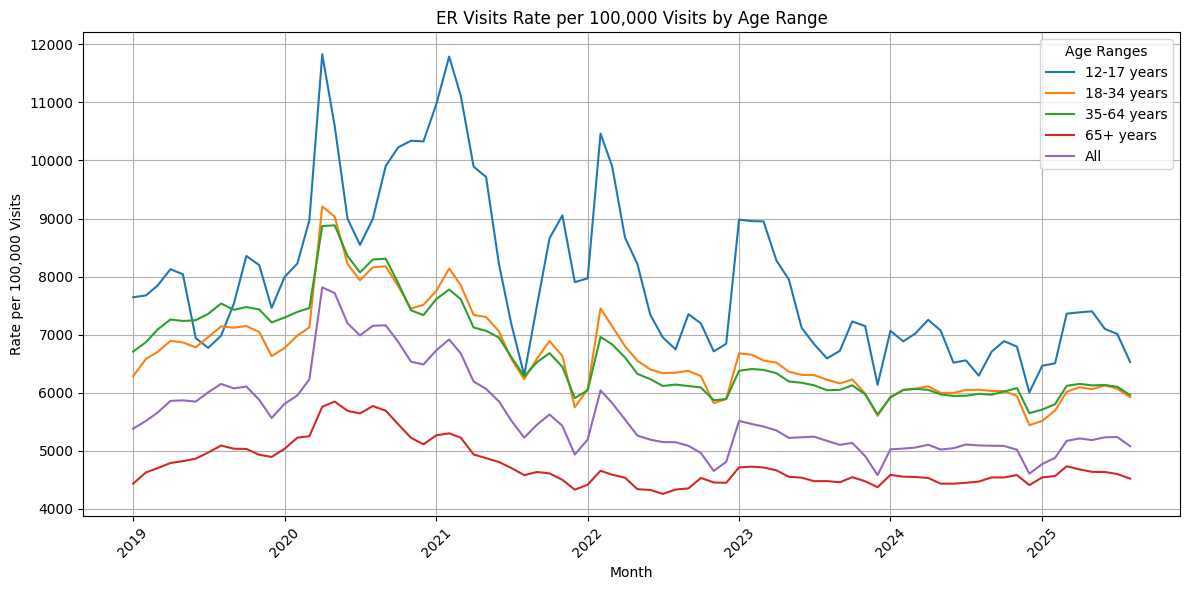

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 6))
for age_range in age_focus['demographics_values'].unique():
    subset = age_focus[age_focus['demographics_values'] == age_range]
    plt.plot(subset['month_end'], subset['rate_per_100000_visits'], label=age_range)

plt.title('Suspected Suicide ER Visits Rate per 100,000 Visits by Age Range')
plt.xlabel('Month')
plt.ylabel('Rate per 100,000 Visits')

plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Age Ranges")
plt.tight_layout()

This graph shows the mental health ranking of each state against each other for 2024. This allows us to see what states are doing things better than others and potentially draw correlations if they potentially started a new initative or where it is located in the US. I chose plotly for this graph as the ability to plot graphs on a map of the US in this case allows you to better visualize if there are trends across areas of the country and see at a glance what states are doing better than others.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
state_abbreviations = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}
mha_state_of_mental_health_report_2024['State_Abbreviation'] = mha_state_of_mental_health_report_2024['State'].map(state_abbreviations)


fig = go.Figure(data=go.Choropleth(
    locations=mha_state_of_mental_health_report_2024['State_Abbreviation'],  
    z=mha_state_of_mental_health_report_2024['Rank'],
    locationmode='USA-states',
    colorbar_title='State Rank',
))

fig.update_layout(
    title_text='State Mental Health Ranking 2024',
    geo_scope='usa',
)

fig.show()

This graph shows the mental health ranking of each state against each other for 2023. This allows us to see what states are doing things better than others and potentially draw correlations if they potentially started a new initative or where it is located in the US. I chose plotly for this graph as the ability to plot graphs on a map of the US in this case allows you to better visualize if there are trends across areas of the country and see at a glance what states are doing better than others. By having both 2023 and 2024 next to each other you can compare if a state has improved their ranking year to year.

In [ ]:
import pandas as pd
import plotly.graph_objects as go
state_abbreviations = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}
mha_state_of_mental_health_report_2023['State_Abbreviation'] = mha_state_of_mental_health_report_2023['State'].map(state_abbreviations)


fig = go.Figure(data=go.Choropleth(
    locations=mha_state_of_mental_health_report_2023['State_Abbreviation'],  
    z=mha_state_of_mental_health_report_2023['Rank'],
    locationmode='USA-states',
    colorbar_title='State Rank',
))

fig.update_layout(
    title_text='State Mental Health Ranking 2023',
    geo_scope='usa',
)

fig.show()

This graph shows the rates of reported poor mental and/or physical health by state. This allows us to visualize if certain areas of the country can affect peoples mental health. This could be used to correlate with weather patterns by area of the country or medical accessability, etc. I chose plotly because I think being able to visualize the data on the map of the US is very helpful to see potential trends or other factors.

In [108]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=cdc_state_depression_rates['Area_abbr'],  
    z=cdc_state_depression_rates['Percent'],
    locationmode='USA-states',
    colorbar_title='Percent',
    zmax=20,
    zmin=5
    #had to set min and max otherwise everything was purple
))

fig.update_layout(
    title_text='Rates of Reported Poor Physical or Mental Health (2023)',
    geo_scope='usa',
)

fig.show()


This graph shows the rates of attempted suicide by state. Unfortunately not all states have data or don't collect it the same way which can result in gaps where we don't know the rates. I chose to leave these blank as opposed to trying to fill them in with summaries or guesses based on other states because as you can see location doesn't play a massive part in the rates so it could potentially be way off the actual rate which felt disingenuous. I chose plotly so you could see the data on a map of the US and so that you could hover over each state to see their respective rates which I think adds to the visual.

In [109]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=cdc_youth_suicide_attempt_rates['Area_abbr'],  
    z=cdc_youth_suicide_attempt_rates['Percent'],
    locationmode='USA-states',
    colorbar_title='Percent',
    zmax=75,
    zmin=0
    #had to set min and max otherwise everything was purple
))

fig.update_layout(
    title_text='Rates of Reported Youth Attempted Suicide',
    geo_scope='usa',
)

fig.show()

# EDA
▶ Produce statistical summaries of the data.
Shown above in parsing phase.

▶ Analyze data distributions of the data.
Shown in graphs above such as in ER visits graph showing how rates change based on age and for state maps how distributions change based on state.

▶ Analyze the correlations between the data features.
You can see correlations between graphs such as the rates of reported poor mental and physical health with the states ranking of mental health with states that are ranked higher having lower rates of mental health issues.

▶ Identifying data issues.
Noted above with missing suicide attempt data and noted reasoning for not replacing data with estimates.

▶ identifying data types that need to be converted/transformed
Noted above with converting date column to date time format and percentage column to numeric format.

# Data Visualizations
▶ Create at least 4 visualizations
Shown above.

▶ Use at least 2 different visualizations libraries (of your choice)
Used Matplotlib and plotly as shown above.

# Data Cleaning and Transformations
▶ Addressing missing values in the dataset
Addressed above in cleaning section on how missing data was handled and removed.

▶ Addressing duplicate values
Addressed above with duplicate ER visit data being filtered before visualizing to increase readability and reduce confusion.

▶ Addressing anomalies and Outliers
Noted above with missing state data and how I chose to address it in the graphs.

▶ Converting and Transforming Data types
Addressed above with converting date time data and percentage data to numerics.

# Machine Learning Plan
Based on the what was covered in the Machine Learning module:
▶ What types of machine learning will you use in your project?
I will most likely use clustering as it will best show how data can be bunched based on mental health issue or state location.
▶ What issues do you see in making that happen?
I think it could be an issue trying to combine the data togther because some data might not be as granular as others.
▶ What challenges will you potentially face?
I think it could be a challenge to combine data from multiple datasets if they are from different date ranges.

# Prior Feedback
Unfortunatly looking at my feedback branch I do not belive I received any so there were no alterations based on that.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

https://unstract.com/blog/guide-to-pdfplumber-text-and-table-extraction-capabilities/

https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe

https://pythonguides.com/python-pandas-drop-rows-example/

https://www.geeksforgeeks.org/pandas/how-to-rename-columns-in-pandas-dataframe/

https://www.statology.org/pandas-reset-index-after-dropna/

https://python-graph-gallery.com/514-interactive-line-chart-plotly/

https://python-graph-gallery.com/122-multiple-lines-chart/

https://python-graph-gallery.com/choropleth-map/

Past labs

In [137]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 16639 bytes to source.py
